In [2]:
import pandas as pd  
import os                
from datetime import datetime
import time
import matplotlib.pyplot as plt
from math import sin, cos, tan
import matplotlib.dates as mdates

In [3]:
#Creating individual dataframe instances of the CSVs to check for any differences. 
csv2021q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q1_RE_Sales.csv")
csv2021q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q2_RE_Sales.csv")
csv2021q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q3_RE_Sales.csv")
csv2021q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q4_RE_Sales.csv")
csv2022q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q1_RE_Sales.csv")
csv2022q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q2_RE_Sales.csv")
csv2022q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q3_RE_Sales.csv")
csv2022q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q4_RE_Sales.csv")
csv2023q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q1_RE_Sales.csv")
csv2023q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q2_RE_Sales.csv")
csv2023q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q3_RE_Sales.csv")
csv2023q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q4_RE_Sales.csv")
csv2024q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2024Q1_RE_Sales.csv")
csv2024q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2024Q2_RE_Sales_incomplete.csv")

#Putting the dataframes into a list so I can make a function to check
data_frames = [
    csv2021q1, csv2021q2, csv2021q3, csv2021q4,
    csv2022q1, csv2022q2, csv2022q3, csv2022q4,
    csv2023q1, csv2023q2, csv2023q3, csv2023q4,
    csv2024q1, csv2024q2
]

#now to make the function to check
for i, df in enumerate(data_frames, start=1):
    print(f"DataFrame {i} structure:")
    df.info()
    print("\n---\n")
#2nd print statement for clarity purposes between dfs

DataFrame 1 structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11313 entries, 0 to 11312
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MLS #                   11313 non-null  object
 1   Class                   11313 non-null  object
 2   Property Type           11313 non-null  object
 3   Address                 11313 non-null  object
 4   City                    11313 non-null  object
 5   Zip                     11313 non-null  object
 6   Neighborhood            597 non-null    object
 7   Subdivision             10258 non-null  object
 8   Bedrooms                11313 non-null  int64 
 9   Total Baths             11313 non-null  int64 
 10  Total Living Area SqFt  11313 non-null  object
 11  Acres                   10844 non-null  object
 12  Year Built              11313 non-null  int64 
 13  List Date               11313 non-null  object
 14  Closing Date            11313 n

##### Column structure is consistent across all DFs. 
##### Dataframe 2 (2021q2) contains the largest set of data at 14862 entries.
##### Dataframe 3 (2021q3) comes in at close second at 14693 entries. 
##### 18 columns for each Df. 


In [4]:
# Directory where your files are located
directory = './Data/'
dfs = []

#loop through all the files in a data directory
for filename in os.listdir(directory):
    #ignore a file start with the name weekly, thats the mortageg rates data 
    if not filename.startswith("weekly"):
        #read file path 
        filepath = os.path.join(directory, filename)
        #read a file in a dataframe
        df = pd.read_csv(filepath)
        #append the file in dictionary 
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)    
combined_df.head()

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977.0,2/9/2021,3/11/2021,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934.0,11/22/2020,1/12/2021,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995.0,4/21/2020,2/1/2021,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998.0,4/21/2020,2/1/2021,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940.0,1/7/2020,1/25/2021,357,"$22,000","$18,500"


In [5]:
#Checking how many values are null per column
combined_df.isnull().sum()

MLS #                          0
Class                          0
Property Type                  0
Address                        0
City                           0
Zip                           42
Neighborhood              155784
Subdivision                17151
Bedrooms                      18
Total Baths                    0
Total Living Area SqFt         0
Acres                      10162
Year Built                    17
List Date                      0
Closing Date                   0
Days On Market                 0
List Price                     0
Sold Price                     0
dtype: int64

In [6]:
#Checking basic structure of df
combined_df.shape

(162138, 18)

##### 162138 rows
##### 18 columns

In [7]:
#Checking data types of the columns
combined_df.dtypes

MLS #                      object
Class                      object
Property Type              object
Address                    object
City                       object
Zip                        object
Neighborhood               object
Subdivision                object
Bedrooms                  float64
Total Baths                 int64
Total Living Area SqFt     object
Acres                      object
Year Built                float64
List Date                  object
Closing Date               object
Days On Market              int64
List Price                 object
Sold Price                 object
dtype: object

##### Zipcode should stay as object due to certain areas formatting for zip codes such as 27006-8256
##### Total living area sqft is currently an object--Should be a float?
##### Should convert year built, list date, closing date to date time format rather than float/objects. 
##### List price and sold price columns should be converted to floats and have "$" stripped for graphing/numerical purposes.
##### Acres should be converted to float and have "Acres" stripped for same reason as list price. 

In [8]:

# Due the existence of 17 null values in the "Year Built" column we should convert these values to floats with a value of "0"
#   prior to the conversion to datetime to avoid any errors. 
combined_df['Year Built'] = combined_df['Year Built'].fillna(0).astype(float)
#Here I convert the recently converted columns that now contain "0" to "0000" for a more seamless datetime conversion.
#   For now we will assume empty columns contain the value "0000". This must be reconsidered for any impact it might have on future analytics. 
combined_df['Year Built'] = combined_df['Year Built'].replace('0', '0000')

# converting "Year Built" from float to datetime. For now I am assuming jan 1 for the day/month
combined_df['Year Built'] = pd.to_datetime(combined_df['Year Built'], format='%Y', errors='coerce')

# converting list date and closing date from str to datetime format. 
combined_df['List Date'] = pd.to_datetime(combined_df['List Date'], format='%m/%d/%Y')
combined_df['Closing Date'] = pd.to_datetime(combined_df['Closing Date'], format='%m/%d/%Y')

In [9]:
combined_df.dtypes

MLS #                             object
Class                             object
Property Type                     object
Address                           object
City                              object
Zip                               object
Neighborhood                      object
Subdivision                       object
Bedrooms                         float64
Total Baths                        int64
Total Living Area SqFt            object
Acres                             object
Year Built                datetime64[ns]
List Date                 datetime64[ns]
Closing Date              datetime64[ns]
Days On Market                     int64
List Price                        object
Sold Price                        object
dtype: object

In [10]:
combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,"$22,000","$18,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,"$3,300,000","$2,975,000"
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,"$4,400,000","$3,900,000"
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,"$4,995,000","$4,415,000"
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,"$5,500,000","$5,000,000"


##### I am receiving a key error on List Price and Sold Price and have tried copy pasting among other methods so my assumption is that there might be hidden characters or leading spaces.
#####       For this reason I will be renaming the columns manually to ensure they are contingent with our eyes. 

In [11]:
#Obtaining index values of columns. 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [12]:
#confirming that index values are correct
print(f"List price should equal {combined_df.columns[16]} and Sold price should equal {combined_df.columns[17]}")

List price should equal List Price and Sold price should equal Sold Price


In [13]:
combined_df.rename(columns={combined_df.columns[16]: "List Price"}, inplace=True)
combined_df.rename(columns={combined_df.columns[17]: "Sold Price"}, inplace=True)
combined_df


,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,"$22,000","$18,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,"$3,300,000","$2,975,000"
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,"$4,400,000","$3,900,000"
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,"$4,995,000","$4,415,000"
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,"$5,500,000","$5,000,000"


In [14]:
combined_df["List Price"] = combined_df["List Price"].str.replace("$", "").str.replace(',', '').astype(float)
combined_df["Sold Price"] = combined_df["Sold Price"].str.replace("$", "").str.replace(',', '').astype(float)

combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,79900.0,79.0
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,40000.0,15000.0
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,36000.0,17000.0
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,29000.0,17000.0
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,22000.0,18500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,4400000.0,3900000.0
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,4995000.0,4415000.0
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,5500000.0,5000000.0


##### List price and sold price have successfully been renamed and converted to floats.
#####
##### Now I will do the same conversion for acres. 
##### Since acres is a range value it is not possible to display this in a single column as floats are single numeric values. 
##### For this reason I will be splitting the acres column into two separate columns, one for min and one for max.  
##### We can average these two columns for graphing purposes. 

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [16]:
combined_df.rename(columns={combined_df.columns[11]: "Acres"}, inplace=True)
#Key value error prevention. It seems some column names contain trailing spaces or hidden characters so i'm just going to do this ahead of time. 

In [17]:
def split_range(range_str):
    if isinstance(range_str, str):
        range_str = range_str.strip()  # removes leading/trailing whitespace
        if range_str.endswith('+'):
            range_str = range_str[:-1].strip()  # removes trailing '+' and any whitespace
        parts = range_str.split('-')
        if len(parts) == 1:
            return [float(parts[0]), float('inf')]  # use infinity for upper bound on values such as "11+" which is an error I received when creating this function. I think Python assumes 11+ means 11-infinity.
        else:
            return [float(parts[0]), float(parts[1])]
    else:
        return [float('nan'), float('nan')]
combined_df[['Acres min', 'Acres max']] = combined_df['Acres'].str.replace(' Acres', '').apply(split_range).tolist()

In [18]:
combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,79900.0,79.0,NaN,NaN
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,40000.0,15000.0,0.51,0.75
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,36000.0,17000.0,NaN,NaN
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,29000.0,17000.0,NaN,NaN
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,22000.0,18500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0,1.00,2.90
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,4400000.0,3900000.0,0.76,0.99
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,4995000.0,4415000.0,6.00,10.90
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,5500000.0,5000000.0,0.51,0.75


In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [20]:
combined_df["Total Living Area SqFt"] = combined_df["Total Living Area SqFt"].str.replace(",", "").astype(float)

### Creating "Season" columns and grouping into the new season columns

In [21]:
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

combined_df['Season Listed'] = combined_df['List Date'].apply(get_season)
combined_df['Season Sold'] = combined_df['Closing Date'].apply(get_season)
combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,...,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max,Season Listed,Season Sold
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,...,1977-01-01,2021-02-09,2021-03-11,9,79900.0,79.0,NaN,NaN,Winter,Spring
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,...,1934-01-01,2020-11-22,2021-01-12,13,40000.0,15000.0,0.51,0.75,Fall,Winter
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,...,1995-01-01,2020-04-21,2021-02-01,254,36000.0,17000.0,NaN,NaN,Spring,Winter
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,...,1998-01-01,2020-04-21,2021-02-01,254,29000.0,17000.0,NaN,NaN,Spring,Winter
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,...,1940-01-01,2020-01-07,2021-01-25,357,22000.0,18500.0,NaN,NaN,Winter,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,...,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0,1.00,2.90,Winter,Spring
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,...,1997-01-01,2024-01-12,2024-04-30,56,4400000.0,3900000.0,0.76,0.99,Winter,Spring
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,...,2008-01-01,2022-09-08,2024-05-01,587,4995000.0,4415000.0,6.00,10.90,Fall,Spring
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,...,2023-01-01,2023-12-22,2024-04-11,0,5500000.0,5000000.0,0.51,0.75,Winter,Spring


In [22]:
#MLS is the ID for a property each time it is sold.
#Class residential 
#Property type: Single family residence
#Drop address dependent on specific data frames goal
#Raleigh as city (first iteration)
#Drop zip, neighborhood, subdivision dependent on specific data frames goal
#Bedrooms 3, baths 2
#Find mean sqft of remaining rows after above changes are made
#Then take 10% on both sides. 
#Drop null acre values (Raleigh contains large amount of null) 
#Drop year built dependent on specific data frames goal
#We'll start with profit 
#Convert dates to week number

#MLS #	Class	Property Type	Address	City	Zip	Neighborhood	Subdivision	Bedrooms	
# Total Baths	Total Living Area SqFt	Acres	Year Built	List Date	Closing Date	
# Days On Market	List Price	Sold Price	Acres_min	Acres_max


#MLS #	Class	Property Type	City	Bedrooms	
# Total Baths	Total Living Area SqFt	Acres	Year Built	List Date	Closing Date	
# Days On Market	List Price	Sold Price	Acres_min	Acres_max

### Graphing List price over time

In [23]:
#here I am filtering the data frame so that the graph only displays 2021-now. I had some issues while graphing where the graph was going all the way back to 1978 so it is necessary to filter
filtered_df = combined_df[(combined_df['List Date'] >= pd.Timestamp('2021-01-01')) & (combined_df['List Date'] <= pd.Timestamp.now())]

#here i am grouping the data by months so that it is easier for us to read. When I plotted it without grouping it resulted in a graph that looks like I had given a monkey a pencil and told it to draw the mona lisa.
monthly_data = filtered_df.resample('M', on='List Date').agg({'List Price': ['sum', 'count']})
monthly_data.columns = ['Total List Price', 'Total Properties Listed']

            Total List Price  Total Properties Listed
List Date                                            
2021-01-31      1.317793e+09                     3777
2021-02-28      1.461228e+09                     4110
2021-03-31      1.774513e+09                     4753
2021-04-30      1.953296e+09                     5180
2021-05-31      1.817615e+09                     4938
2021-06-30      1.952697e+09                     5108
2021-07-31      1.941057e+09                     5190
2021-08-31      1.961203e+09                     5074
2021-09-30      1.941481e+09                     4958
2021-10-31      1.870570e+09                     4760
2021-11-30      1.436431e+09                     3760
2021-12-31      1.179042e+09                     3064
2022-01-31      1.306933e+09                     3242
2022-02-28      1.597114e+09                     3769
2022-03-31      2.076921e+09                     4759
2022-04-30      2.223474e+09                     5073
2022-05-31      2.362347e+09

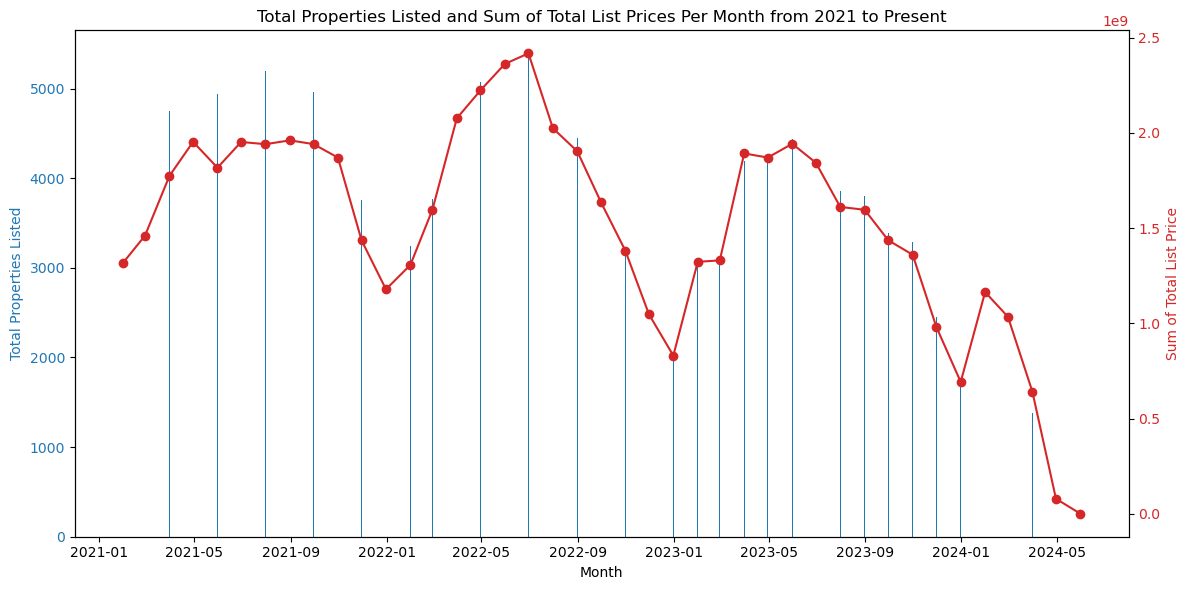

In [24]:
#setting the fig size. had to play around a bit to find a good fit.
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar chart that displays total properties listed per month.
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Properties Listed', color=color)
ax1.bar(monthly_data.index, monthly_data['Total Properties Listed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Total Properties Listed and Sum of Total List Prices Per Month from 2021 to Present')



# twin axes for the sum of the list prices
# telling the program that the axes will be plotted on the same graph. 
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Sum of Total List Price', color=color)
ax2.plot(monthly_data.index, monthly_data['Total List Price'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


#tightening the layout
fig.tight_layout()  
print(monthly_data)
plt.show()

### Fixing winston-salem vs winston salem rows:

In [25]:
combined_df = combined_df.replace(["Winston Salem"], "Winston-Salem")

In [26]:
combined_df.loc[combined_df["City"] == "Winston-Salem"]

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,...,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max,Season Listed,Season Sold
147,119442,RESIDENTIAL,Single Family Residence,2205 Sunderland Road,Winston-Salem,27103,NaN,NaN,2.0,2,...,1973-01-01,2021-01-19,2021-01-19,1135,65000.0,65000.0,0.00,0.25,Winter,Winter
360,114006,RESIDENTIAL,Single Family Residence,2313 Terra Stone Court,Winston-Salem,27103,NaN,NaN,2.0,2,...,1982-01-01,2020-12-28,2021-03-09,18,102000.0,101200.0,0.00,0.25,Winter,Spring
803,116402,RESIDENTIAL,Single Family Residence,2745 Laguna Avenue,Winston-Salem,27103,NaN,NaN,3.0,2,...,1971-01-01,2021-02-12,2021-03-26,3,144900.0,143500.0,0.00,0.25,Winter,Spring
1684,114163,RESIDENTIAL,Single Family Residence,4142 Duck Pond Court,Winston-Salem,27107,NaN,NaN,3.0,3,...,2018-01-01,2021-01-11,2021-02-09,1,179900.0,187900.0,0.00,0.25,Winter,Winter
13345,116769,RESIDENTIAL,Single Family Residence,3143 Bushfield Drive,Winston-Salem,27127,NaN,NaN,3.0,3,...,2011-01-01,2021-03-12,2021-04-06,1,190000.0,200400.0,0.00,0.25,Spring,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152944,LP719469,RESIDENTIAL,Single Family Residence,2231 Beechwood View Drive,Winston-Salem,27106.0,NaN,NaN,3.0,2,...,2023-01-01,2024-01-31,2024-02-01,0,350000.0,350000.0,NaN,NaN,Winter,Winter
153336,10008399,RESIDENTIAL,Single Family Residence,252 Smith Meadow Lane,Winston-Salem,27107.0,Winston Hills,Not in a Subdivision,3.0,3,...,2013-01-01,2024-01-19,2024-03-28,40,675000.0,365000.0,3.00,5.90,Winter,Spring
154591,10002093,RESIDENTIAL,Single Family Residence,6198 Narrow Way Lane,Winston-Salem,27105.0,NaN,Not in a Subdivision,3.0,2,...,1987-01-01,2023-12-12,2024-02-22,22,425000.0,418000.0,3.00,5.90,Winter,Winter
155895,10011304,RESIDENTIAL,Single Family Residence,19 Garden Valley Drive,Winston-Salem,27107.0,NaN,To Be Added,4.0,3,...,2006-01-01,2024-02-12,2024-03-06,2,500000.0,510000.0,1.00,2.90,Winter,Spring


In [27]:
city_counts = combined_df['City'].value_counts()

#resetting index to check alphabetically
city_counts_df = city_counts.reset_index()
#making new column to show occurrences
city_counts_df.columns = ['City', 'Occurrences']

#sorting alphabetically
city_counts_df = city_counts_df.sort_values('City')


city_counts_df.to_csv('City_Occurrences.csv', index=False)

###### Winston-Salem looks to be the only duplicate city name.

#### Grouping by City, Zip, Sold Price:
#### Grouping by City, Zip, Days on market:

In [28]:
sold_price_grouped = combined_df[["City", "Zip", "Sold Price"]].sort_values(by="Sold Price", ascending=True)
DaysOnMarket_grouped = combined_df[["City", "Zip", "Days On Market"]].sort_values(by="Days On Market", ascending=True)

### Days on market grouped for all cities/zipcodes:
### Sold Price grouped for all cities/zipcodes:

In [29]:
display(DaysOnMarket_grouped, sold_price_grouped)

,City,Zip,Days On Market
162137,Fuquay Varina,27526,0
61498,Fayetteville,28306,0
61499,Wendell,27591,0
61500,Benson,27504,0
61501,Chapel Hill,27516,0
...,...,...,...
21487,Willow Springs,27592,1285
2986,Graham,27253,1336
21867,Burlington,27215,1459
40886,Fayetteville,28311,2398


,City,Zip,Sold Price
0,Fayetteville,28311,79.0
126464,Hope Mills,28348,221.0
138391,Warrenton,27589,345.0
104034,Southern Pines,28387,375.0
148348,Durham,27712.0,498.0
...,...,...,...
66277,Raleigh,27614,6150000.0
148347,Raleigh,27608,6400000.0
138389,Cary,27518,6498000.0
138390,Chapel Hill,27514,6625000.0


####  DOM = days on market
#### Sold Price = SP

In [30]:
raleigh_grouped_all = combined_df.loc[combined_df["City"] == "Raleigh"]
raleigh_grouped_SP = sold_price_grouped.loc[sold_price_grouped["City"] == "Raleigh"]
raleigh_grouped_DOM = DaysOnMarket_grouped.loc[DaysOnMarket_grouped["City"] == "Raleigh"]
raleigh_grouped_all

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,...,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max,Season Listed,Season Sold
77,2363011,RESIDENTIAL,Single Family Residence,3001 Sadie Hopkins Street,Raleigh,27603-2925,NaN,Not in a Subdivision,1.0,1,...,1962-01-01,2021-01-22,2021-03-10,16,49900.0,46000.0,0.26,0.50,Winter,Spring
158,2363765,RESIDENTIAL,Condo,4700 Westgrove Street,Raleigh,27606,NaN,Westgrove Towers,1.0,1,...,1986-01-01,2021-01-28,2021-02-23,5,69000.0,67000.0,0.00,0.25,Winter,Winter
312,2358748,RESIDENTIAL,Manufactured,10933 Stage Drive,Raleigh,27603-9698,NaN,Old Stage Estates,3.0,2,...,1983-01-01,2020-12-21,2021-02-01,0,100000.0,95000.0,0.00,0.25,Winter,Winter
325,2359213,RESIDENTIAL,Townhouse,2708 Big Oak Street,Raleigh,27610,NaN,Fox Hollow,2.0,2,...,1991-01-01,2020-12-28,2021-01-28,4,90000.0,97719.0,0.00,0.25,Winter,Winter
333,2345311,RESIDENTIAL,Condo,1212 Schaub Drive,Raleigh,27606,NaN,Driftwood,2.0,1,...,1972-01-01,2020-09-28,2021-01-29,100,110000.0,99000.0,0.00,0.25,Fall,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162127,2520009,RESIDENTIAL,Single Family Residence,721 Wimbleton Drive,Raleigh,27609,NaN,Chestnut Hills,5.0,7,...,2024-01-01,2023-07-06,2024-04-12,0,2650000.0,2599999.0,0.26,0.50,Summer,Spring
162130,2523512,RESIDENTIAL,Single Family Residence,1612 Pony Run Road,Raleigh,27615,NaN,North Ridge,5.0,7,...,2023-01-01,2023-07-26,2024-05-02,0,2750000.0,2750000.0,0.26,0.50,Summer,Spring
162131,10009998,RESIDENTIAL,Single Family Residence,2606 Cromwell Road,Raleigh,27608,NaN,Budleigh,5.0,7,...,2024-01-01,2024-02-05,2024-04-22,0,2795000.0,2775000.0,0.26,0.50,Winter,Spring
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,...,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0,1.00,2.90,Winter,Spring


### Raleigh Sold price:
### Raleigh Days on market:

In [31]:
display(raleigh_grouped_SP, raleigh_grouped_DOM)

,City,Zip,Sold Price
138392,Raleigh,27607,2200.0
77,Raleigh,27603-2925,46000.0
126530,Raleigh,27603,56000.0
126529,Raleigh,27603,56000.0
126527,Raleigh,27603,56000.0
...,...,...,...
158137,Raleigh,27615.0,5100000.0
148346,Raleigh,27609,5478186.0
126463,Raleigh,27614,5833358.0
66277,Raleigh,27614,6150000.0


,City,Zip,Days On Market
61512,Raleigh,27610,0
61402,Raleigh,27610,0
61438,Raleigh,27616,0
61440,Raleigh,27610,0
61540,Raleigh,27607,0
...,...,...,...
54626,Raleigh,27609-6960,741
11308,Raleigh,27614,785
138379,Raleigh,27609-7618,931
55055,Raleigh,27609-7636,1003


### Creating a filtered DataFrame for Raleigh; removing unnecessary columns:

In [32]:
raleigh_grouped_3_2 = raleigh_grouped_all.loc[
    (raleigh_grouped_all["Bedrooms"] == 3.0) &
    (raleigh_grouped_all["Total Baths"] == 2.0)
]
raleigh_grouped_3_2 = raleigh_grouped_3_2[[
    "MLS #", "Property Type", "City", "Bedrooms", 
    "Total Baths", "Total Living Area SqFt",
    "Year Built", "List Date", "Closing Date",
    "Days On Market", "List Price", "Sold Price", "Acres min", "Acres max",
    "Season Listed", "Season Sold"
    ]]

to_drop = raleigh_grouped_3_2[raleigh_grouped_3_2["Property Type"] == "Duplex"].index
raleigh_grouped_3_2 = raleigh_grouped_3_2.drop(to_drop)
raleigh_grouped_3_2


single_family_residence_3_2 = raleigh_grouped_3_2.loc[raleigh_grouped_3_2['Property Type'] == 'Single Family Residence']
single_family_residence_3_2

,MLS #,Property Type,City,Bedrooms,Total Baths,Total Living Area SqFt,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max,Season Listed,Season Sold
1072,2344840,Single Family Residence,Raleigh,3.0,2,1266.0,1965-01-01,2020-09-24,2021-01-15,80,175000.0,160000.0,0.26,0.50,Fall,Winter
1145,2362351,Single Family Residence,Raleigh,3.0,2,1317.0,1960-01-01,2021-01-19,2021-02-18,2,165000.0,165000.0,0.00,0.25,Winter,Winter
1150,2358689,Single Family Residence,Raleigh,3.0,2,1145.0,1969-01-01,2020-12-20,2021-02-04,0,160000.0,165000.0,0.26,0.50,Winter,Winter
1215,2363586,Single Family Residence,Raleigh,3.0,2,1245.0,1969-01-01,2021-01-27,2021-02-10,0,165000.0,168700.0,0.26,0.50,Winter,Winter
1614,2358230,Single Family Residence,Raleigh,3.0,2,1126.0,2000-01-01,2020-12-17,2021-02-01,2,184900.0,185000.0,0.00,0.25,Winter,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161851,10018101,Single Family Residence,Raleigh,3.0,2,2174.0,1940-01-01,2024-03-20,2024-04-12,1,840000.0,880000.0,0.26,0.50,Spring,Spring
161925,10002210,Single Family Residence,Raleigh,3.0,2,1994.0,1872-01-01,2023-12-12,2024-04-12,1,999995.0,955000.0,0.00,0.25,Winter,Spring
161930,10014298,Single Family Residence,Raleigh,3.0,2,1754.0,1935-01-01,2024-02-29,2024-04-03,3,935000.0,975000.0,0.00,0.25,Winter,Spring
161961,10015703,Single Family Residence,Raleigh,3.0,2,1720.0,1955-01-01,2024-03-07,2024-04-10,0,1033000.0,1033000.0,0.76,0.99,Spring,Spring


In [33]:
raleigh_grouped_3_2["Property Type"].value_counts()

Property Type
Single Family Residence    3031
Townhouse                   179
Condo                       157
Manufactured                 39
Ranch                         7
Name: count, dtype: int64

### Visualization of days on market per season listed

##### "DOM" = Days on market
##### "SZN" = Season

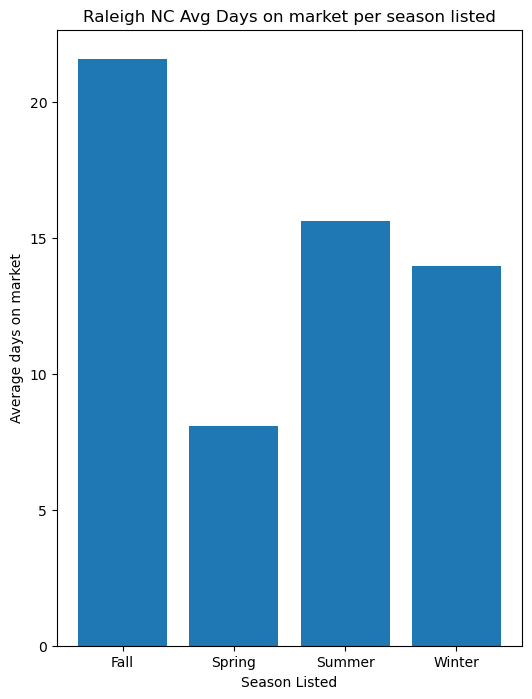

In [34]:
raleigh_DOM_SZN_grouped = raleigh_grouped_3_2.groupby("Season Listed")["Days On Market"].mean()
raleigh_DOM_SZN_grouped
plt.figure(figsize=(6, 8))
plt.xlabel("Season Listed")
plt.ylabel("Average days on market")
plt.bar(raleigh_DOM_SZN_grouped.index, raleigh_DOM_SZN_grouped.values)
plt.title("Raleigh NC Avg Days on market per season listed")
plt.show()


### Visualization of Delta between List Price and sale price based on seasonality:

##### Creating new column called "Price Delta":

In [35]:
raleigh_grouped_3_2["Price Delta"] = raleigh_grouped_3_2["Sold Price"] - raleigh_grouped_3_2["List Price"]
#raleigh_grouped_3_2

#### Price delta per season bar chart:

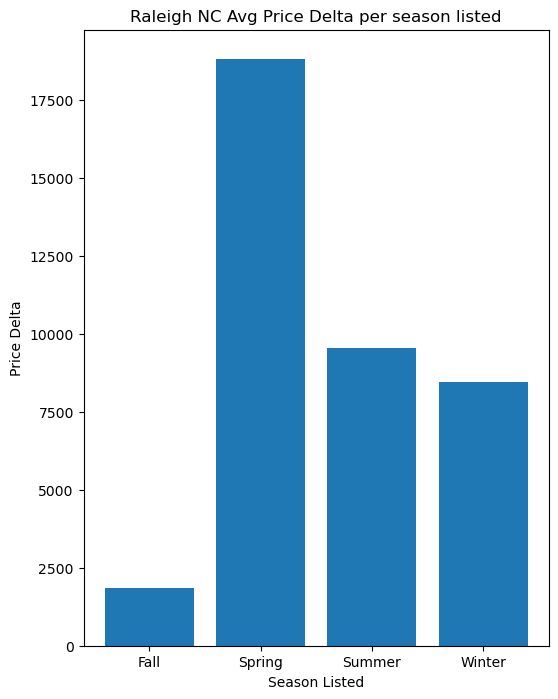

In [36]:
raleigh_delta_SZN_grouped = raleigh_grouped_3_2.groupby("Season Listed")["Price Delta"].mean()
plt.figure(figsize=(6, 8))
plt.xlabel("Season Listed")
plt.ylabel("Price Delta")
plt.bar(raleigh_delta_SZN_grouped.index, raleigh_delta_SZN_grouped.values)
plt.title("Raleigh NC Avg Price Delta per season listed")
plt.show()

# Analysis of Mortage rates and effect on 

## correlations between mortgage rates and DOM and the LP-SP delta 

In [37]:
# read all the mortage data from the CSV  File
mortageweekly_df = pd.read_excel("../Real-Estate-Analysis-Project/Data/weekly_mortgage_rates.xlsx",
                                 index_col="Week",
                                 parse_dates=True
                                 )
mortageweekly_df.head()

,30 Years FRM,30 years points,15 years FRM,15 years points,ARM,ARM points,margin,spread
Week,,,,,,,,
1971-04-02,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-09,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-16,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-23,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
1971-04-30,7.29,,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\atulv\AppData\Local\Temp\ipykernel_36220\2031557172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortageweekly_df_sliced.drop(columns=['30 years points','15 years FRM','15 years points','ARM','ARM points','margin','spread'],inplace=True)


<Axes: xlabel='Week'>

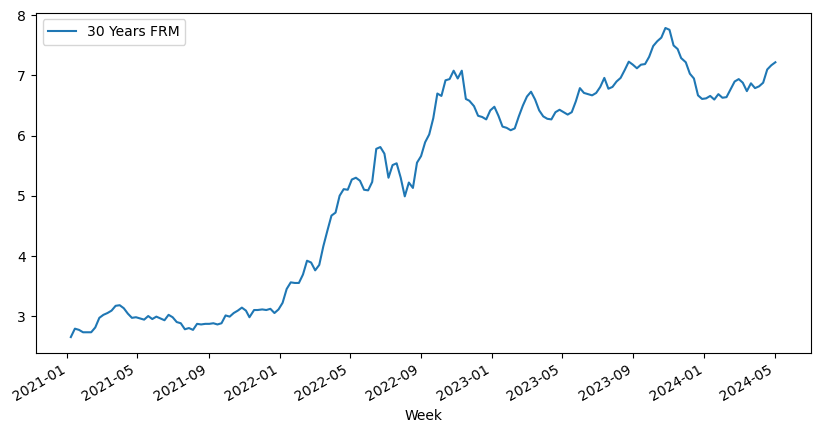

In [38]:
# Get the morrtgage data from 2021 ro 2014 
mortageweekly_df_sliced = mortageweekly_df.loc['2021-01-01':'2024-05-30']

#drop unwanted columns
mortageweekly_df_sliced.drop(columns=['30 years points','15 years FRM','15 years points','ARM','ARM points','margin','spread'],inplace=True)

mortageweekly_df_sliced.plot(figsize=[10,5])

In [39]:
# add a column of week and year
mortageweekly_df_sliced["week-year"]  = mortageweekly_df_sliced.index.year.astype(str) + mortageweekly_df_sliced.index.isocalendar().week.astype(str)
mortageweekly_df_sliced.head()

C:\Users\atulv\AppData\Local\Temp\ipykernel_36220\1277012548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortageweekly_df_sliced["week-year"]  = mortageweekly_df_sliced.index.year.astype(str) + mortageweekly_df_sliced.index.isocalendar().week.astype(str)


,30 Years FRM,week-year
Week,,
2021-01-07,2.65,20211
2021-01-14,2.79,20212
2021-01-21,2.77,20213
2021-01-28,2.73,20214
2021-02-04,2.73,20215


In [44]:
#single_family
single_family_residence_3_2["week-year"]  = single_family_residence_3_2['List Date'].dt.year.astype(str) + single_family_residence_3_2['List Date'].dt.isocalendar().week.astype(str)
single_family_residence_3_2["Price Delta"] = single_family_residence_3_2["Sold Price"] - single_family_residence_3_2["List Price"]
single_family_residence_3_2.head() #162138 

C:\Users\atulv\AppData\Local\Temp\ipykernel_36220\2138719502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_residence_3_2["week-year"]  = single_family_residence_3_2['List Date'].dt.year.astype(str) + single_family_residence_3_2['List Date'].dt.isocalendar().week.astype(str)
C:\Users\atulv\AppData\Local\Temp\ipykernel_36220\2138719502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_family_residence_3_2["Price Delta"] = single_family_residence_3_2["Sold Price"] - single_family_r

,MLS #,Property Type,City,Bedrooms,Total Baths,Total Living Area SqFt,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres min,Acres max,Season Listed,Season Sold,week-year,Price Delta
1072,2344840,Single Family Residence,Raleigh,3.0,2,1266.0,1965-01-01,2020-09-24,2021-01-15,80,175000.0,160000.0,0.26,0.50,Fall,Winter,202039,-15000.0
1145,2362351,Single Family Residence,Raleigh,3.0,2,1317.0,1960-01-01,2021-01-19,2021-02-18,2,165000.0,165000.0,0.00,0.25,Winter,Winter,20213,0.0
1150,2358689,Single Family Residence,Raleigh,3.0,2,1145.0,1969-01-01,2020-12-20,2021-02-04,0,160000.0,165000.0,0.26,0.50,Winter,Winter,202051,5000.0
1215,2363586,Single Family Residence,Raleigh,3.0,2,1245.0,1969-01-01,2021-01-27,2021-02-10,0,165000.0,168700.0,0.26,0.50,Winter,Winter,20214,3700.0
1614,2358230,Single Family Residence,Raleigh,3.0,2,1126.0,2000-01-01,2020-12-17,2021-02-01,2,184900.0,185000.0,0.00,0.25,Winter,Winter,202051,100.0


In [46]:
realeastate_df  = pd.merge(mortageweekly_df_sliced,single_family_residence_3_2,on="week-year",how="inner")
#realeastate_df.set_index("List Date", inplace=True)
realeastate_monthly_df = realeastate_df.resample('M', on='List Date').agg({'Days On Market': ['mean'],"30 Years FRM":['mean'], "Price Delta":['mean']})

realeastate_monthly_df.columns = ['Avg Days on Market', 'Avg Intereset Rate','Avg Price Delta']

realeastate_monthly_df.head()



,Avg Days on Market,Avg Intereset Rate,Avg Price Delta
List Date,,,
2021-01-31,7.441176,2.735882,10625.000000
2021-02-28,6.866667,2.820667,12694.453333
2021-03-31,4.962264,3.083679,14104.773585
2021-04-30,4.344538,3.041261,20031.151261
2021-05-31,5.956989,2.967204,19606.688172


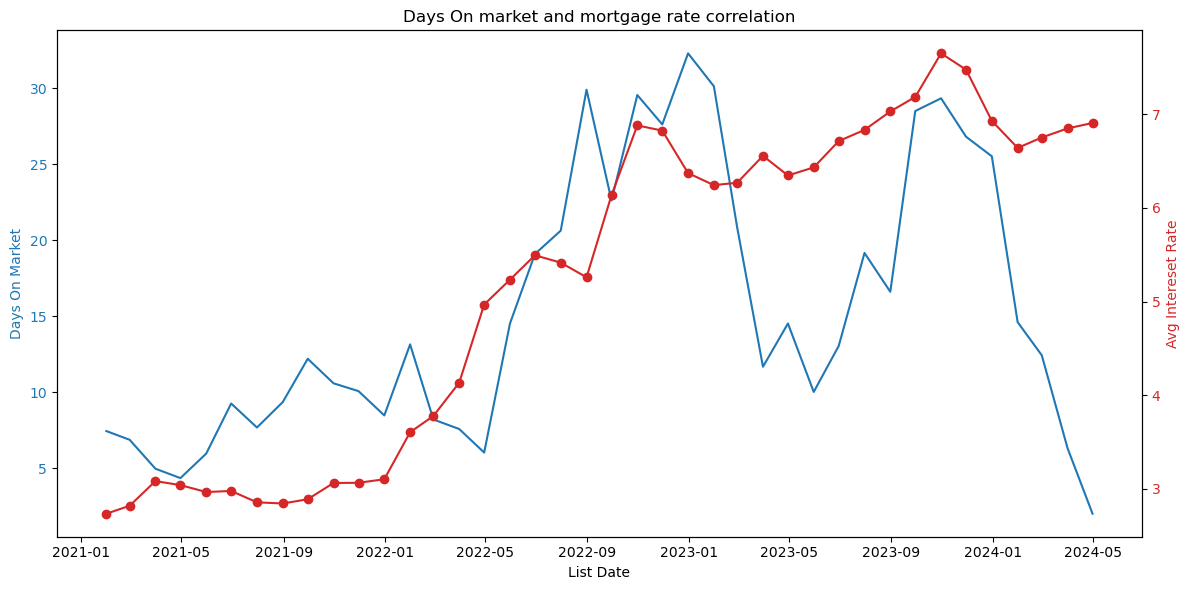

In [42]:


#setting the fig size. had to play around a bit to find a good fit.
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar chart that displays total properties listed per month.
color = 'tab:blue'
ax1.set_xlabel('List Date')
ax1.set_ylabel('Days On Market', color=color)
ax1.plot(realeastate_monthly_df.index, realeastate_monthly_df['Avg Days on Market'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Days On market and mortgage rate correlation')


# twin axes for the sum of the list prices
# telling the program that the axes will be plotted on the same graph. 
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Avg Intereset Rate', color=color)
ax2.plot(realeastate_monthly_df.index, realeastate_monthly_df['Avg Intereset Rate'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


#tightening the layout
fig.tight_layout()  
plt.show()


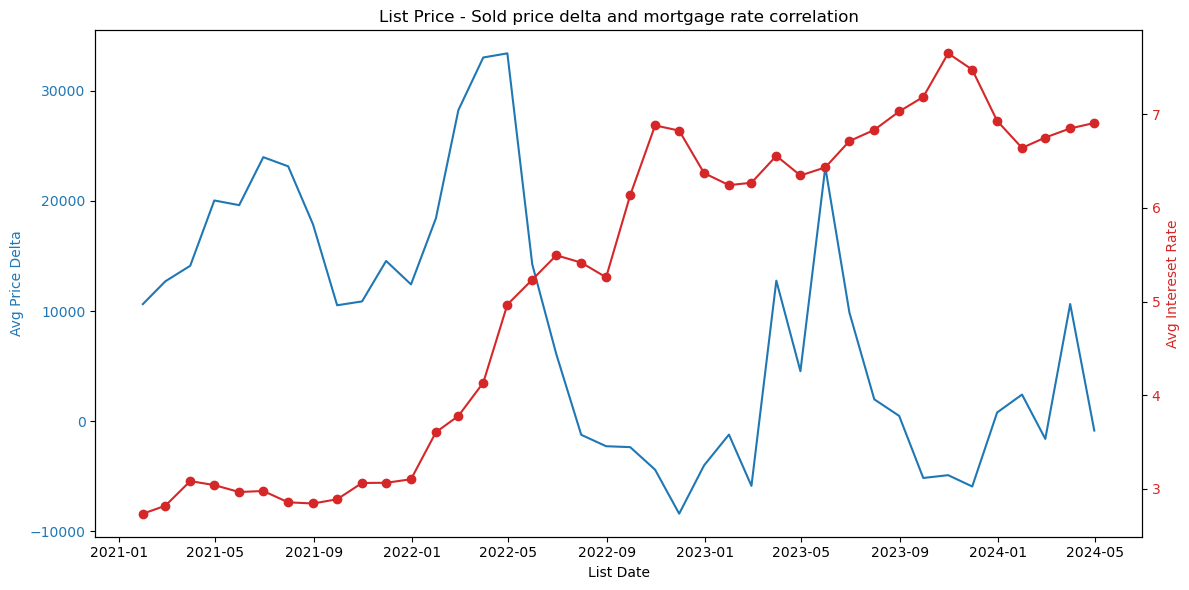

In [48]:


#setting the fig size. had to play around a bit to find a good fit.
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar chart that displays total properties listed per month.
color = 'tab:blue'
ax1.set_xlabel('List Date')
ax1.set_ylabel('Avg Price Delta', color=color)
ax1.plot(realeastate_monthly_df.index, realeastate_monthly_df['Avg Price Delta'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('List Price - Sold price delta and mortgage rate correlation')


# twin axes for the sum of the list prices
# telling the program that the axes will be plotted on the same graph. 
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Avg Intereset Rate', color=color)
ax2.plot(realeastate_monthly_df.index, realeastate_monthly_df['Avg Intereset Rate'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


#tightening the layout
fig.tight_layout()  
plt.show()



In [ ]:
#realeastate_df[['Days On Market']].plot()

